<a href="https://colab.research.google.com/github/minjunkim-99/pytohn/blob/main/api_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#api 연동을 통한 년도별 전국 평균 에너지 사용금액 정보 조회

In [24]:
import requests

# 데이터 참조 url
url1 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'
url2 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'
# 인증키1
params1 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201508'
}
# 인증키2
params2 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201608'
}
# 데이터를 object화
response1 = requests.get(url1, params=params1)
response2 = requests.get(url2, params=params2)

content1 = response1.text
content2 = response2.text
# 데이터 출력
print(content1)
print(content2)


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><item><elect>755</elect><gas>1</gas><heat>22</heat><waterCool>211</waterCool><waterHot>40</waterHot></item></body></response>
<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><item><elect>920</elect><gas>1</gas><heat>20</heat><waterCool>225</waterCool><waterHot>30</waterHot></item></body></response>


In [9]:
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote
"""
resultCode : 결과코드
resultMsg : 결과메시지
kaptCode : 단지코드
heat : 난방사용금액
hheat : 난방사용량
waterHot : 급탕사용금액
hwaterHot : 급탕사용량
gas : 가스사용금액
hgas : 가스사용량
elect: 전기사용금액
helect : 전기사용량
waterCool : 수도사용금액
hwaterCool : 수도사용량
"""
xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><elect>920</elect><gas>1</gas><heat>20</heat><waterCool>225</waterCool><waterHot>30</waterHot></item>]


In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]
    df = pd.DataFrame(row_list, columns=name_list)
print(df.head(19))


  elect gas heat waterCool waterHot
0   920   1   20       225       30


In [27]:
import tabulate

# 표 출력을 위한 옵션 설정
tabulate.PRESERVE_WHITESPACE = True

# 표 생성
table = tabulate.tabulate(df, headers='keys', tablefmt='pipe')

# 표 출력
print(table)

# 데이터 유형 확인
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)

|    |   elect |   gas |   heat |   waterCool |   waterHot |
|---:|--------:|------:|-------:|------------:|-----------:|
|  0 |     920 |     1 |     20 |         225 |         30 |
Index([], dtype='object')


In [28]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import requests
from tabulate import tabulate

url1 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'
url2 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'

params1 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201508'
}

params2 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201608'
}

response1 = requests.get(url1, params=params1)
response2 = requests.get(url2, params=params2)

content1 = response1.text
content2 = response2.text

table1 = [['Response 1'], [content1]]
table2 = [['Response 2'], [content2]]

print(tabulate(table1, headers="firstrow", tablefmt="grid", colalign=("left",)))
print(tabulate(table2, headers="firstrow", tablefmt="grid", colalign=("left",)))


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Response 1                                                                                                                                                                                                                                                                             |
+========================================================================================================================================================================================================================================================================================+
| <?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><b

In [30]:
import requests
import xml.etree.ElementTree as ET
from tabulate import tabulate


url1 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'
url2 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'


params1 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201508'
}

params2 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201608'
}

response1 = requests.get(url1, params=params1)
response2 = requests.get(url2, params=params2)

root1 = ET.fromstring(response1.content)
root2 = ET.fromstring(response2.content)

elect1 = root1.find('.//elect').text
gas1 = root1.find('.//gas').text
heat1 = root1.find('.//heat').text
waterCool1 = root1.find('.//waterCool').text
waterHot1 = root1.find('.//waterHot').text

elect2 = root2.find('.//elect').text
gas2 = root2.find('.//gas').text
heat2 = root2.find('.//heat').text
waterCool2 = root2.find('.//waterCool').text
waterHot2 = root2.find('.//waterHot').text

table1 = [['Electricity', 'Gas', 'Heat', 'Water Cooling', 'Water Heating'], [elect1, gas1, heat1, waterCool1, waterHot1]]
table2 = [['Electricity', 'Gas', 'Heat', 'Water Cooling', 'Water Heating'], [elect2, gas2, heat2, waterCool2, waterHot2]]

print(tabulate(table1, headers="firstrow", tablefmt="grid"))
print(tabulate(table2, headers="firstrow", tablefmt="grid"))


+---------------+-------+--------+-----------------+-----------------+
|   Electricity |   Gas |   Heat |   Water Cooling |   Water Heating |
+===============+=======+========+=================+=================+
|           755 |     1 |     22 |             211 |              40 |
+---------------+-------+--------+-----------------+-----------------+
+---------------+-------+--------+-----------------+-----------------+
|   Electricity |   Gas |   Heat |   Water Cooling |   Water Heating |
+===============+=======+========+=================+=================+
|           920 |     1 |     20 |             225 |              30 |
+---------------+-------+--------+-----------------+-----------------+


In [5]:
# 데이터를 숫자형 데이터로 변환
numeric_columns = ['elect', 'gas', 'heat', 'waterCool', 'waterHot']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)


print(df.head())


   elect  gas  heat  waterCool  waterHot
0    920    1    20        225        30


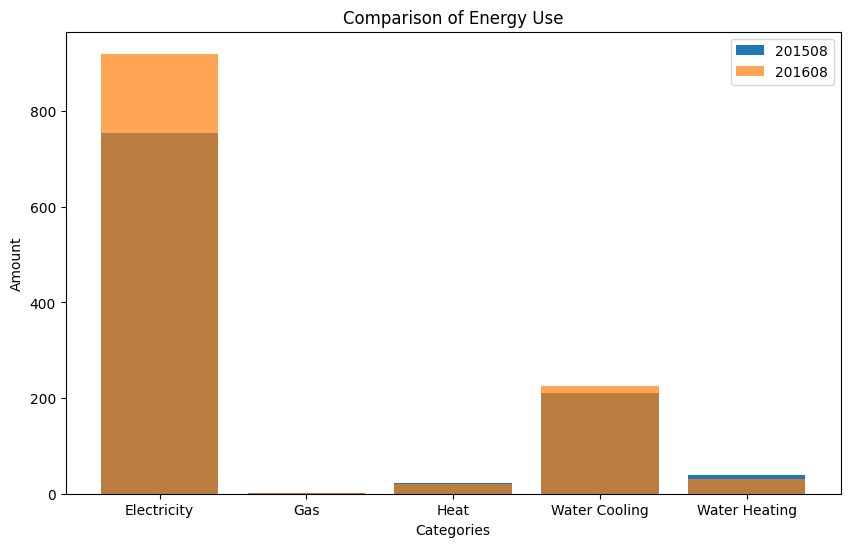

In [32]:
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

url1 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'
url2 = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch'

params1 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201508'
}

params2 = {
    'serviceKey': 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==',
    'searchDate': '201608'
}

response1 = requests.get(url1, params=params1)
response2 = requests.get(url2, params=params2)

root1 = ET.fromstring(response1.content)
root2 = ET.fromstring(response2.content)

elect1 = int(root1.find('.//elect').text)
gas1 = int(root1.find('.//gas').text)
heat1 = int(root1.find('.//heat').text)
waterCool1 = int(root1.find('.//waterCool').text)
waterHot1 = int(root1.find('.//waterHot').text)

elect2 = int(root2.find('.//elect').text)
gas2 = int(root2.find('.//gas').text)
heat2 = int(root2.find('.//heat').text)
waterCool2 = int(root2.find('.//waterCool').text)
waterHot2 = int(root2.find('.//waterHot').text)

categories = ['Electricity', 'Gas', 'Heat', 'Water Cooling', 'Water Heating']
data1 = [elect1, gas1, heat1, waterCool1, waterHot1]
data2 = [elect2, gas2, heat2, waterCool2, waterHot2]

plt.figure(figsize=(10, 6))
plt.bar(categories, data1, label='201508')
plt.bar(categories, data2, label='201608', alpha=0.7)
plt.xlabel('Categories')
plt.ylabel('Amount')
plt.title('Comparison of Energy Use')
plt.legend()
plt.show()
